# 로컬 개발 코드
- 로컬에서 주피터 노트북(Jupyter Notebook), 주피터 랩(JupyterLab) 또는 파이썬(Python)을 이용한다. 
- 사이킷 런(scikit-learn), 텐서플로우(tensorflow), 파이토치(pytorch)를 사용하여 딥러닝 프로그램을 개발한다.
- 파일명: 0_local_text_generation.ipynb

### 로컬 개발 워크플로우(workflow)  
- 로컬 개발 워크플로우를 다음의 4단계로 분리한다.

1. **데이터셋 준비(Data Setup)**
- 로컬 저장소에서 전처리 및 학습에 필요한 학습 데이터셋을 준비한다.

2. **데이터 전처리(Data Preprocessing)**
- 데이터셋의 분석 및 정규화(Normalization)등의 전처리를 수행한다.
- 데이터를 모델 학습에 사용할 수 있도록 가공한다.
- 추론과정에서 필요한 경우, 데이터 전처리에 사용된 객체를 meta_data 폴더 아래에 저장한다.

3. **학습 모델 훈련(Train Model)**
- 데이터를 훈련에 사용할 수 있도록 가공한 뒤에 학습 모델을 구성한다. 
- 학습 모델을 준비된 데이터셋으로 훈련시킨다.
- 정확도(Accuracy)나 손실(Loss)등 학습 모델의 성능을 검증한다.
- 학습 모델의 성능 검증 후, 학습 모델을 배포한다.
- 배포할 학습 모델을 meta_data 폴더 아래에 저장한다.

4. **추론(Inference)**
- 저장된 전처리 객체나 학습 모델 객체를 준비한다.
- 추론에 필요한 테스트 데이터셋을 준비한다.
- 배포된 학습 모델을 통해 테스트 데이터에 대한 추론을 진행한다. 

# 승하차 분류 (Image Classification)
- 지금부터 skeleton points를 이용하여 승하차 분류 (classification)을 진행해보고자 한다.

## 승하차

### 사용할 데이터

- aihub에서 제공하는 Open Dataset 
- 해당 데이터셋은 원천 데이터인 이미지 데이터와 annotations 정보를 가진 json 파일들로 이루어져 있다.

### 사용할 3개의 annotations 정보
- keypoints
- get_on
- get_off

## **1. 데이터셋 준비(Data Setup)**

In [2]:
# 모듈 로딩
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
from tqdm import tqdm 
import numpy as np
import seaborn as sns
import zipfile
import cv2
import tensorflow as tf
from tensorflow_docs.vis import embed

from imblearn.under_sampling import RandomUnderSampler,TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adagrad
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

from keras.layers import Dropout, Flatten, LSTM, Bidirectional, Dense, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Conv3D, MaxPool2D

ModuleNotFoundError: No module named 'tensorflow_docs'

In [10]:
C3_downtown = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_C_3/downtown/'
C3_supermarket = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_C_3/supermarket/'
C3_village = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_C_3/village/'
A1_apt = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_A_1/apt/'
A1_etc = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_A_1/etc/'
A1_supermarket = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_A_1/supermarket/'
A2_apt = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_A_2/apt/'
A2_hospital = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_A_2/hospital/'
A2_village = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_A_2/village/'
A3_downtown = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_A_3/downtown/'
A3_mid_high = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_A_3/mid_high/'
A3_subway = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_A_3/subway/'
A3_university = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_A_3/university/'
B1_district = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_B_1/district/'
B1_etc = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_B_1/etc/'
B1_hospital = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_B_1/hospital/'
B2_downtown = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_B_2/downtown/'
B2_mid_high = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_B_2/mid_high/'
B2_university = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_B_2/university/'
B3_ele = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_B_3/ele/'
B3_supermarket = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_B_3/supermarket/'
B3_village = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_B_3/village/'
C1_apt = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_C_1/apt/'
C2_ele = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_C_2/ele/'
C2_etc = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_C_2/etc/'
C2_hospital = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_C_2/hospital/'
C2_mid_high = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_C_2/mid_high/'
C2_university = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_C_2/university/'

#### annotations 정보 read

각 폴더의 json 파일 annotations 정보를 읽어와 DataFrame을 생성한다. 

In [11]:
# 각 폴더의 json 파일 annotations 정보를 읽어와 DataFrame을 생성한다. 

def make_df(path):
    bbox = []
    keypoints = []
    action = []
    get_on = []
    get_off = []
    for i in os.listdir(path):
        os.listdir(path+i)
        file_list = os.listdir(path+i)
       
        for a in file_list:
            with open ((path+i+'/'+a),"r") as j:
                contents = json.loads(j.read())
                if len(contents['annotations']) != 0:
                    for idx in range(len(contents['annotations'])):
                            bbox.append(contents['annotations'][idx]['bbox'])
                            keypoints.append(contents['annotations'][idx]['keypoints'])
                            get_on.append(contents['annotations'][idx]['get_on'])
                            get_off.append(contents['annotations'][idx]['get_off'])
    df = pd.DataFrame({'bbox':bbox,
                       'keypoints':keypoints,
                       'get_on':get_on,
                       'get_off':get_off})
    get = []

    # 승하차 column 생성
    # get_off(승차) = 0, get_on(하차) = 1, nothing = 2
    
    for i in range(len(df['get_on'])):
        if (list(df['get_on'])[i] == False) and (list(df['get_off'])[i] == False):
            get.append(2)
        elif (list(df['get_on'])[i] == True) and (list(df['get_off'])[i] == False):
            get.append(1)
        else:
            get.append(0)
    df['get'] = get

    return df 

In [12]:
# 각 폴더의 데이터를 DataFrame으로 생성한다.

C3_downtown_df = make_df(C3_downtown)
C3_supermarket_df = make_df(C3_supermarket)
C3_village_df = make_df(C3_village)
A1_apt_df = make_df(A1_apt)
A1_etc_df = make_df(A1_etc)
A1_supermarket_df = make_df(A1_supermarket)
A2_apt_df = make_df(A2_apt)
A2_hospital_df = make_df(A2_hospital)
A2_village_df = make_df(A2_village)
A3_downtown_df = make_df(A3_downtown)
A3_mid_high_df = make_df(A3_mid_high)
A3_subway_df = make_df(A3_subway)
A3_university_df = make_df(A3_university)
B1_district_df = make_df(B1_district)
B1_etc_df = make_df(B1_etc)
B1_hospital_df = make_df(B1_hospital)
B2_downtown_df = make_df(B2_downtown)
B2_mid_high_df = make_df(B2_mid_high)
B2_university_df = make_df(B2_university)
B3_ele_df = make_df(B3_ele)
B3_supermarket_df = make_df(B3_supermarket)
B3_village_df = make_df(B3_village)
C1_apt_df = make_df(C1_apt)
C2_ele_df = make_df(C2_ele)
C2_etc_df = make_df(C2_etc)
C2_hospital_df = make_df(C2_hospital)
C2_mid_high_df = make_df(C2_mid_high)
C2_university_df = make_df(C2_university)

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_C_3/downtown/'

In [ ]:
# 승하차 train data 생성한다

bus_df = pd.concat([A1_apt_df,A1_etc_df,A1_supermarket_df,A2_apt_df,
                   A2_hospital_df,A2_village_df,A3_downtown_df,A3_mid_high_df,A3_subway_df,A3_university_df,B1_district_df,
                   B1_etc_df,B1_hospital_df,B2_downtown_df,B2_mid_high_df,B2_university_df,B3_ele_df,B3_supermarket_df,
                   B3_village_df,C1_apt_df,C2_ele_df,C2_etc_df,C2_hospital_df,C2_mid_high_df,C2_university_df,C3_downtown_df,
                   C3_supermarket_df,C3_village_df])

In [ ]:
# 승하차 train 데이터를 csv파일로 저장한다

bus_df.to_csv('./getonoff(train).csv', index=False, encoding='cp949')

In [ ]:
# meta_data 폴더 안에 dataset 폴더를 생성한다

zip_target_path = './meta_data/dataset'
os.makedirs(zip_target_path, exist_ok=True)

In [ ]:
# dataset.zip 파일을 dataset 폴더에 압축을 풀어준다.

zip_source_path = './dataset.zip'

extract_zip_file = zipfile.ZipFile(zip_source_path)
extract_zip_file.extractall(zip_target_path)
 
extract_zip_file.close()

In [ ]:
# 압축을 해제한 파일을 불러온다
zip_target_path = './meta_data/dataset'
df = pd.read_csv(zip_target_path+'/'+'getonoff(train).csv')

In [ ]:
df

bbox  \
0        [974, 266, 1471, 1077]   
1       [1017, 224, 1452, 1060]   
2       [1007, 224, 1445, 1049]   
3       [1007, 222, 1428, 1049]   
4        [995, 220, 1421, 1044]   
...                         ...   
803900     [706, 338, 905, 897]   
803901   [1118, 242, 1282, 622]   
803902     [587, 235, 731, 603]   
803903     [688, 217, 870, 672]   
803904     [703, 338, 905, 911]   

                                                keypoints  get_on  get_off  \
0       [1074, 1020, 2, 1111, 923, 2, 1151, 752, 2, 12...    True    False   
1       [1094, 918, 2, 1131, 802, 2, 1185, 643, 2, 131...    True    False   
2       [1085, 909, 2, 1118, 787, 2, 1174, 634, 2, 129...    True    False   
3       [1082, 908, 2, 1113, 786, 2, 1155, 627, 2, 127...    True    False   
4       [1071, 904, 2, 1102, 782, 2, 1144, 623, 2, 127...    True    False   
...                                                   ...     ...      ...   
803900  [801, 834, 1, 797, 746, 1, 811, 649, 2, 849, 6...   False     True   
803901  [1135, 596, 1, 1148, 472, 1, 1160, 432, 1, 123...   False    False   
803902  [626, 574, 1, 605, 456, 1, 635, 411, 2, 690, 4...   False    False   
803903  [719, 604, 2, 714, 479, 2, 756, 429, 1, 844, 4...   False    False   
803904  [796, 822, 1, 794, 745, 1, 796, 652, 2, 835, 6...   False     True   

        get  
0         1  
1         1  
2         1  
3         1  
4         1  
...     ...  
803900    0  
803901    2  
803902    2  
803903    2  
803904    0  

[803905 rows x 5 columns]

<AxesSubplot: ylabel='count'>

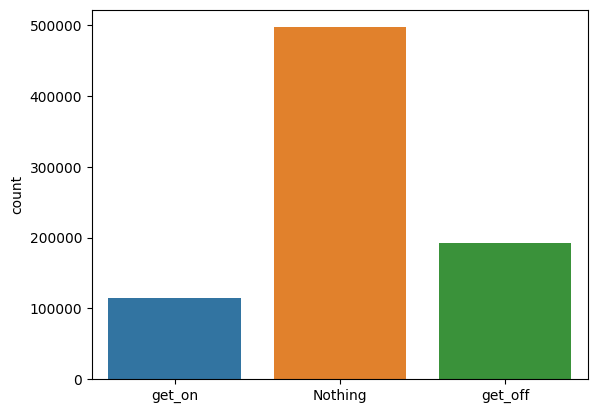

In [ ]:
# 불균형 데이터 분표 확인

sns.countplot(x = list(map({0:'get_off', 1:'get_on', 2:'Nothing'}.get, df['get'])))

## 2. 데이터 전처리 (Data Preprocessing)

### 데이터 준비 (Preparing Data)

앞서 확인하고 분석한 numpy array들을 훈련에 사용할 수 있는 형태로 바꾸고자 한다.

- 데이터 전처리
  - skeleton 좌표인 16개의 keypoints가 각각의 list에 들어가 있다. '[','[' 문자를 제거하고 하나의 list로 만들어준다. (strip)
  - train, test data 분리 위해 리스트를 2차원 배열로 만든다.
- 훈련 (train) & 평가 (test) 데이터셋 생성
  - 전체 데이터 중 일부는 훈련 (train)에 사용하고, 나머지 일부는 훈련된 모델의 성능을 평가 (test)하기 위해 사용하고자 한다. (`train_test_split`)

In [ ]:
df

bbox  \
0        [974, 266, 1471, 1077]   
1       [1017, 224, 1452, 1060]   
2       [1007, 224, 1445, 1049]   
3       [1007, 222, 1428, 1049]   
4        [995, 220, 1421, 1044]   
...                         ...   
803900     [706, 338, 905, 897]   
803901   [1118, 242, 1282, 622]   
803902     [587, 235, 731, 603]   
803903     [688, 217, 870, 672]   
803904     [703, 338, 905, 911]   

                                                keypoints  get_on  get_off  \
0       [1074, 1020, 2, 1111, 923, 2, 1151, 752, 2, 12...    True    False   
1       [1094, 918, 2, 1131, 802, 2, 1185, 643, 2, 131...    True    False   
2       [1085, 909, 2, 1118, 787, 2, 1174, 634, 2, 129...    True    False   
3       [1082, 908, 2, 1113, 786, 2, 1155, 627, 2, 127...    True    False   
4       [1071, 904, 2, 1102, 782, 2, 1144, 623, 2, 127...    True    False   
...                                                   ...     ...      ...   
803900  [801, 834, 1, 797, 746, 1, 811, 649, 2, 849, 6...   False     True   
803901  [1135, 596, 1, 1148, 472, 1, 1160, 432, 1, 123...   False    False   
803902  [626, 574, 1, 605, 456, 1, 635, 411, 2, 690, 4...   False    False   
803903  [719, 604, 2, 714, 479, 2, 756, 429, 1, 844, 4...   False    False   
803904  [796, 822, 1, 794, 745, 1, 796, 652, 2, 835, 6...   False     True   

        get  
0         1  
1         1  
2         1  
3         1  
4         1  
...     ...  
803900    0  
803901    2  
803902    2  
803903    2  
803904    0  

[803905 rows x 5 columns]

#### 데이터 전처리

In [ ]:
# keypoints list 생성

keypoints_list = []
for i in tqdm(range(len(df['keypoints']))): # tqdm은 작업진행률을 표시하는 모듈이다
    keypoints_list.append(np.array(list(map(int,df.keypoints[i].strip('[').strip(']').split(',')))))
    
# train, test 분리 위해 list를 2차열 배열로 변경해준다.

keypoints2arr = np.array(keypoints_list)

100%|██████████| 803905/803905 [00:13<00:00, 59394.53it/s]


In [ ]:
keypoints2arr.shape

(803905, 48)

##### 훈련 & 평가 데이터셋 생성

전체 데이터셋 중 **8:2**의 비율로 훈련:평가 데이터셋을 생성한다.

In [ ]:
# train, test 데이터셋 생성

X_train,X_test,y_train,y_test=train_test_split(keypoints2arr,df['get'],
                                               test_size=0.2,
                                               random_state=42,
                                               shuffle=True,
                                               stratify=df['get']) # 불균형 데이터이기 때문에 stratify를 target으로 설정한다
                                                                   # 같은 비율로 target 개수가 train, test 데이터로 분리된다

#### 훈련 & 검증 데이터셋 생성
train 데이터 중 8:2 비율로 훈련:검증 데이터셋을 생성한다.

In [ ]:
# train, val 데이터셋 생성

X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,
                                               test_size=0.2,
                                               random_state=42,
                                               shuffle=True,
                                               stratify=y_train) # 불균형 데이터이기 때문에 stratify를 target으로 설정한다
                                                                 # 같은 비율로 target 개수가 train, val 데이터로 분리된다

## **3. 학습 모델 훈련 (Train Model)**

승하차 분류를 위해 아주 간단한 CNN 모델을 Keras를 이용하여 구축하고자 한다.

In [ ]:
# CNN 모델 구축

def model_CNN():

  model=Sequential()
  model.add(Conv2D(128, kernel_size=3, padding='same', input_shape=(16, 1, 3))) # 3차원
  model.add(MaxPool2D(pool_size=2, padding='same'))
  
  model.add(Flatten()) # 1차원으로 데이터 형태 변환 Layer 
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(3, activation='softmax')) # get_on, get_of, nothing 출력
  
  return model

In [ ]:
# EarlyStopping(val_loss 10회 이상 개선 없을시 멈춘다.)

patience = 10
stopCB = EarlyStopping(monitor='val_loss', patience=patience)

# ModelCheckpoint는 모델이 학습하면서 정의한 조건을 만족했을 때 Model의 weight 값을 중간 저장
    
modelpath='./meta_data/model.h5' # best model을 model.h5의 이름으로 저장한다

checkpointer = ModelCheckpoint(filepath=modelpath,  # file명 지정
                               monitor ='val_loss', # val_loss 값이 개선 되었을때 호출
                               verbose=1,           # 로그 출력 
                               save_best_only=True) # val_loss best 값 저장

### 모델 컴파일 및 학습 (Compile and Train Model)

- 모델 컴파일 (Compile Model)
  - Keras의 compile 함수를 통해 모델의 optimizer, loss, 그리고 metrics를 선택할 수 있다.
  - Loss: categoriacal_crossentropy
    - 우리는 레이블로 one-hot-encoding을 사용했으므로 loss로 'categorical_crossentropy'를 사용한다.
- 모델 학습 (Train Model)
  - 앞서 구축한 모델을 준비해준 입력 데이터와 레이블 데이터로 학습시킨다.

In [ ]:
# 모델 compile

model = model_CNN()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', 
                  metrics = ['accuracy'])

# 모델 학습을 위해 데이터를 reshape을 사용해 (-1,16,1,3) 형태의 배열로 만들어준다

X_train = X_train.reshape(-1,16,1,3) 
X_val = X_val.reshape(-1,16,1,3)
X_test = X_test.reshape(-1,16,1,3)

# 모델 학습을 위해 target 데이터 또한 One Hot Encoding을 사용해 인코딩 해준다

y_train = to_categorical(y_train, num_classes = 3)
y_val = to_categorical(y_val, num_classes = 3) 
y_test = to_categorical(y_test, num_classes = 3) 

# 모델 학습

epochs = 50
batch_size = 128
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                     validation_data=(X_val,y_val), callbacks=[stopCB,checkpointer])

Epoch 1/50
4018/4020 [============================>.] - ETA: 0s - loss: 0.7482 - accuracy: 0.7649
Epoch 1: val_loss improved from inf to 0.52876, saving model to ./meta_data\model.h5
4020/4020 [==============================] - 24s 6ms/step - loss: 0.7481 - accuracy: 0.7649 - val_loss: 0.5288 - val_accuracy: 0.8053
Epoch 2/50
4018/4020 [============================>.] - ETA: 0s - loss: 0.5027 - accuracy: 0.8157
Epoch 2: val_loss improved from 0.52876 to 0.45028, saving model to ./meta_data\model.h5
4020/4020 [==============================] - 30s 7ms/step - loss: 0.5027 - accuracy: 0.8157 - val_loss: 0.4503 - val_accuracy: 0.8327
Epoch 3/50
4018/4020 [============================>.] - ETA: 0s - loss: 0.4600 - accuracy: 0.8324
Epoch 3: val_loss improved from 0.45028 to 0.41981, saving model to ./meta_data\model.h5
4020/4020 [==============================] - 34s 9ms/step - loss: 0.4600 - accuracy: 0.8324 - val_loss: 0.4198 - val_accuracy: 0.8434
Epoch 4/50
4015/4020 [===================

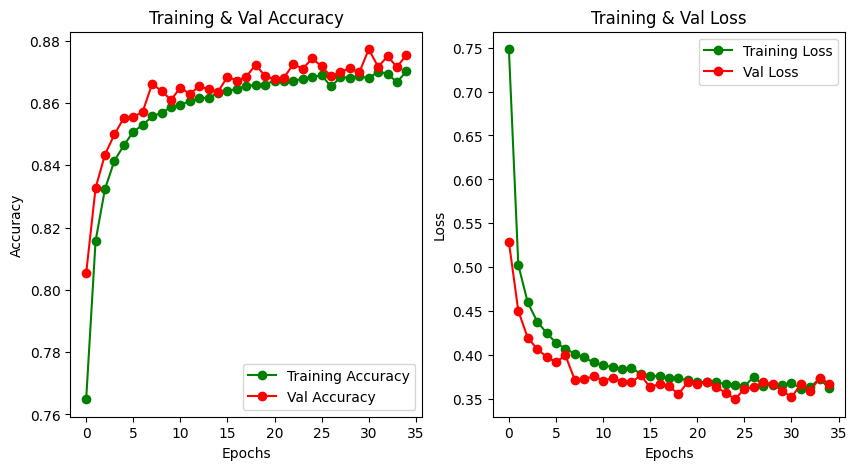

In [ ]:
#Plot accuracy and loss curves for both training and validation data
hist_epochs = hist.epoch # epoch수
fig , ax = plt.subplots(1,2) # 서브plot => 1행 2열
train_acc = hist.history['accuracy'] # train accuracy값
train_loss = hist.history['loss'] # train loss값
val_acc = hist.history['val_accuracy'] # validation accuracy값
val_loss = hist.history['val_loss'] # validation loss값
fig.set_size_inches(10, 5)

# 1행 1열 plot => train과 validation Accuracy 비교
ax[0].plot(hist_epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(hist_epochs , val_acc , 'ro-' , label = 'Val Accuracy')
ax[0].set_title('Training & Val Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

# 1행 2열 plot => train과 validation Loss 비교
ax[1].plot(hist_epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(hist_epochs , val_loss , 'r-o' , label = 'Val Loss')
ax[1].set_title('Training & Val Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

### 모델 평가
- 모델 예측(model predict)
    - test 데이터로 모델을 예측한다
- 모델 평가(model evaluate)
    - 실제값과 예측값을 가지고 모델을 평가한다
         - confusion_matrix
         - accuracy_score
         - classification_report

In [ ]:
# test데이터 평가

y_pred = hist.model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.array(y_test)
y_test = np.argmax(y_test, axis=1)

# calculate_confusion_matrix (혼동행렬, 정확도 점수, 분류보고서)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

5025/5025 [==============================] - 8s 1ms/step
[[29913   903  7549]
 [ 1361 17819  3817]
 [ 4899  1474 93046]]
0.8755885334709947
              precision    recall  f1-score   support

           0       0.83      0.78      0.80     38365
           1       0.88      0.77      0.83     22997
           2       0.89      0.94      0.91     99419

    accuracy                           0.88    160781
   macro avg       0.87      0.83      0.85    160781
weighted avg       0.87      0.88      0.87    160781



## **4. 추론 (Inference)**

훈련시킨 모델을 직접 사용해보고자 한다. 잘 훈련된 모델이라면 버스 승객의 승하차 영상을 입력 데이터로 주었을 때, 승하차 여부를 결과값으로 모델이 내보낼 것이다. 그 과정을 진행해보고자 한다.

- 영상 프레임마다 사람의 skeletone points 반환
- 저장한 keypoints를 모델의 입력 데이터 형태로 변환
- 결과 확인
- 추론 영상

##### Movenet: 이미지 프레임에서 사람의 관절 위치를 예측하는 컨볼루션 신경망 모델  
- 최대 6명의 사람과 포즈를 감지하며, 17개 keypoints 예측

In [3]:
# 저장된 movenet 모델 불러옴
loaed_model = tf.saved_model.load("./movenet/1/")
movenet = loaed_model.signatures['serving_default']

In [4]:
# keypoint 위치
# 0:코, 1:왼쪽 눈, 2:오른쪽 눈, 3:왼쪽 귀, 4:오른쪽 귀, 5:왼쪽 어깨, 6:오른쪽 어깨, 7:왼쪽 팔꿈치, 8:오른쪽 팔꿈치,
# 9:왼쪽 손목, 10:오른쪽 손목, 11:왼쪽 엉덩이, 12:오른쪽 엉덩이, 13:왼쪽 무릎, 14:오른쪽 무릎, 15:왼쪽 발목, 16:오른쪽 발목
# 연결 선
EDGES = [(0, 1), (0, 2), (1, 3), (2, 4), (0, 5), (0, 6), (5, 7), (7, 9), (6, 8), (8, 10),
        (5, 6), (5, 11), (6, 12), (11, 12), (11, 13), (13, 15), (12, 14), (14, 16)]

# 승하차
dataset1 = ['get on', 'get off', 'nothing']
# 이상행동
# dataset2 = ['stand', 'walk', 'sit down', 'lay down']

# 학습 모델 준비
modelpath= './movenet/47-0.3917(승하차).hdf5'
model = load_model(modelpath)

# 동영상 불러 오기 (승하차)
cap = cv2.VideoCapture('./movenet/KakaoTalk_20221125_105400422.mp4')

NameError: name 'load_model' is not defined

In [37]:
# 영상에 시각화를 하기 위한 함수들
# 객체마다 draw_keypoints, draw_connections 반복
def loop_through_people(frame, keypoints_with_scores, edges, confidence_threshold):
    for person in keypoints_with_scores:
        draw_connections(frame, person, edges, confidence_threshold)
        draw_keypoints(frame, person, confidence_threshold)

# 프레임에 찍힌 관절 좌표 선으로 연결해 주는 함수
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, _ = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge in edges:
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):   
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)

# 프레임에 관절 좌표 그리는 함수
def draw_keypoints(frame, keypoints, confidence_threshold):
    global point_list
    y, x, _ = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))

    points = []

    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 4, (0, 255, 0), -1)
            # skeletone points 저장
            points.append((int(kx), int(ky), 0))
    # 객체마다 points 따로 저장시켜 줌
    point_list.append(points)

##### 영상 프레임마다 사람의 skeletone points 반환
- 영상을 읽어 와서 프레임으로 나눈다.
- 이미지 프레임을 (1xHxWx3) 형태로 만든 뒤, int32 타입으로 변형시켜 준다.
- 변형된 이미지를 movenet 모델에 넣어서 도출해낸 output을 (6, 17, 3) 형태로 반환한다.

##### 저장한 keypoints를 모델의 입력 데이터 형태로 변환
- 

##### 결과 확인

입력 데이터를 모델에 넣었을 때, 결과값이 하나의 숫자로 나오는 것이 아닌 총 3개의 카테고리에 대한 신뢰도 (confidence)를 전부 보여 준다. 우리는 이 중에서 가장 큰 신뢰도를 보이는 레이블, 즉 모델이 가장 정답으로 확신하는 답을 print해서 보여 주고자 한다.

In [41]:
while cap.isOpened(): # 영상 실행하는 동안
    point_list = []
    ret, frame = cap.read()

    if not ret: # frame이 없을 경우
        print('Done.')
        break
    
    img = frame.copy()
    # 비디오 프레임을 int32 tensor of dynamic shape (1xHxWx3)로 변환
    # 프레임 크기 32의 배수, 큰 면을 256으로 권장
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 192, 256)
    input_img = tf.cast(img, dtype=tf.int32)

    movenet_model = movenet(input_img) # output: (1, 6, 56)
    keypoints_with_scores = movenet_model['output_0'].numpy()[:,:,:51].reshape((6, 17, 3))

    loop_through_people(frame, keypoints_with_scores, EDGES, 0.2) # 임계값 0.2

    for point in point_list:
        if len(point) == 17: # keypoints가 다 잡혔을 때 결과값 예측
            # train model에 들어간 keypoints랑 movenet에 검출되는 keypoints 순서가 달라서 변환
            switch = [point[16], point[14], point[12], point[11], point[13], point[15], point[4], point[0], point[2], point[1],
                    point[10], point[8], point[6], point[5], point[7], point[9]]

            # 모델 입력 데이터로 사용하기 위해 reshape 
            input_data = np.array(switch).reshape(-1,16,1,3)

            # 추론
            y_pred = model.predict(input_data)

            # 결과 확인
            # argmax는 배열 중 가장 큰 값의 인덱스를 반환해 준다.
            y_pred_idx = y_pred.argmax()
            result = dataset1[y_pred_idx]
            cv2.putText(frame, dataset1[y_pred_idx], (point[0][0]-100, point[0][1]-100), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2, lineType=cv2.LINE_AA)
            print(result)
    
    cv2.imshow('show frame', frame)
                
    if cv2.waitKey(100) & 0xFF==ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 48ms/step
get on
1/1 [==============================] - 0s 15ms/step
get on
1/1 [==============================] - 0s 16ms/step
get on
1/1 [==============================] - 0s 16ms/step
nothing
1/1 [==============================] - 0s 15ms/step
get on
1/1 [==============================] - 0s 16ms/step
get on
1/1 [==============================] - 0s 16ms/step
get on
1/1 [==============================] - 0s 15ms/step
get on
1/1 [==============================] - 0s 16ms/step
get on
1/1 [==============================] - 0s 15ms/step
get on
1/1 [==============================] - 0s 16ms/step
get on
1/1 [==============================] - 0s 16ms/step
get on
1/1 [==============================] - 0s 16ms/step
nothing
1/1 [==============================] - 0s 16ms/step
get on
1/1 [==============================] - 0s 15ms/step
get on
1/1 [==============================] - 0s 16ms/step
get on
1/1 [==============================] - 0s 16ms/step
ge

##### 추론 영상
- 결과가 도출된 영상을 확인하고자 한다.

In [13]:
embed.embed_file('./movenet/버스승차영상.mp4')